This task is about to build the various time series models to forecasting the "Domestic Market (Contract) Blow Molding, Low" using  ARIMA , LSTM and lazyregression,

lets start with importing liberies 

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

importing dataset


In [2]:
data=pd.read_csv('Random Price Dataset Trial Assignment.xlsx - Raw data.csv')

In [3]:
data.head()

,Date,"Domestic Market (Contract) Blow Molding, Low",Spot/Export Blow Molding,"Spot, Domestic",WTISPLC,MCOILBRENTEU,GASREGM,IMPCH,EXPCH,PRUBBUSDM,...,Russia_import,South_Africa_import,Turkey_import,Brazil_import,France_import,Germeny_import,United Kingdome_import,China_import,Japan_import,South_korea_import
0,01/01/2000,41,NaN,NaN,27.18,25.51,1.289,6902.1,863.1,29.207387,...,NaN,NaN,"6,833,222.00","2,649,293.00","35,239,920.00",NaN,NaN,NaN,NaN,NaN
1,01/02/2000,41,NaN,NaN,29.35,27.78,1.377,6584.4,972.7,33.391099,...,NaN,NaN,"5,647,987.00","2,787,667.00","36,716,752.00",NaN,NaN,NaN,NaN,NaN
2,01/03/2000,45,NaN,NaN,29.89,27.49,1.516,6424.1,1330.5,30.941913,...,NaN,NaN,"6,721,125.00","4,692,701.00","45,144,561.00",NaN,NaN,NaN,NaN,NaN
3,01/04/2000,47,NaN,NaN,25.74,22.76,1.465,7070.5,1227.5,31.930148,...,NaN,NaN,"7,169,182.00","2,565,068.00","32,240,349.00",NaN,NaN,NaN,NaN,NaN
4,01/05/2000,47,NaN,NaN,28.78,27.74,1.487,7850.2,1526.3,31.201702,...,NaN,NaN,"10,466,333.00","4,671,325.00","29,351,633.00",NaN,NaN,NaN,NaN,NaN


convert the date column object into datetime 

In [4]:
data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y')

we have to find out the frequency of date column is equal or not , if it's not equally frequent we can convert them using resample() method

In [5]:
time_diff=data['Date'].diff()
time_diff

0         NaT
1     31 days
2     29 days
3     31 days
4     30 days
        ...  
271   31 days
272   31 days
273   30 days
274   31 days
275   30 days
Name: Date, Length: 276, dtype: timedelta64[ns]

In [6]:
new_data=data.iloc[:,:2]
new_data.set_index(['Date'],drop=True,inplace=True)

<AxesSubplot:xlabel='Date'>

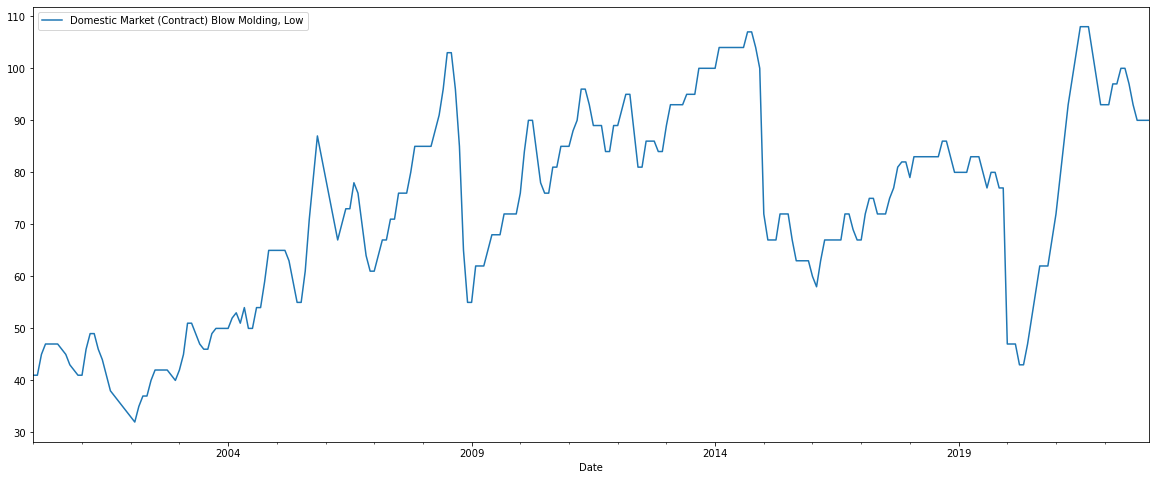

In [7]:
new_data.plot(figsize=(20,8)) 

as per observation we can see data pattern is randon or we can say it's irregular.
If data pattern is random or irregular, it may be more difficult to identify a clear trend or seasonal component, which are the primary causes of non-stationarity. In this case, differencing may be the most effective method for converting the data into a stationary series.

Differencing involves computing the difference between consecutive observations in the time series. This can help remove any trend or seasonality that is present in the data, and make the series more stationary. For a random or irregular series, first-order differencing may be sufficient to create a stationary series.

In [8]:
new_data_resample=new_data.resample('M').mean()
new_data_resample

,"Domestic Market (Contract) Blow Molding, Low"
Date,
2000-01-31,41.0
2000-02-29,41.0
2000-03-31,45.0
2000-04-30,47.0
2000-05-31,47.0
...,...
2022-08-31,93.0
2022-09-30,90.0
2022-10-31,90.0


In [9]:
from statsmodels.tsa.stattools import adfuller 

result=adfuller(new_data_resample)
print('ADF Statistic : %f'%result[0])
print('p-value:%f'%result[1])
print('critical values:')
for key, value in result[4].items():
    print('\t%s:%.3f'%(key,value))


ADF Statistic : -2.239717
p-value:0.192148
critical values:
	1%:-3.455
	5%:-2.872
	10%:-2.572


p-value is 0.19 its means data is non-stationary .
for the better accuracy nessecary to convert data non-stationary into stationary


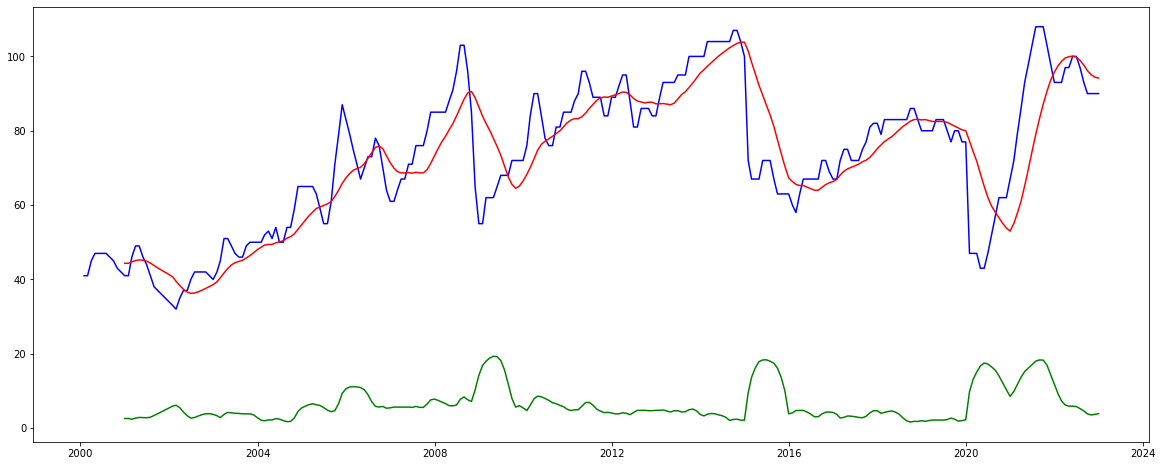

In [10]:
rolling_mean=new_data_resample.rolling(window=12).mean()
rolling_std=new_data_resample.rolling(window=12).std()
plt.figure(figsize=(20,8))
plt.plot(new_data_resample,color='blue',label='original')
plt.plot(rolling_mean,color='red',label='rolling mean')
plt.plot(rolling_std,color='green',label='rolling std')
plt.show()

Non-stationary data refers to data that has a changing mean, variance, or covariance over time. In order to analyze non-stationary data, it is often necessary to transform it into stationary data, which has constant statistical properties over time. One common method of converting non-stationary data into stationary data is through differencing.

Differencing involves taking the difference between consecutive observations in the data. Specifically, if the non-stationary data is denoted by Y_t, then the first difference of the data, denoted by dY_t, is calculated as:

dY_t = Y_t - Y_{t-1}

<AxesSubplot:xlabel='Date'>

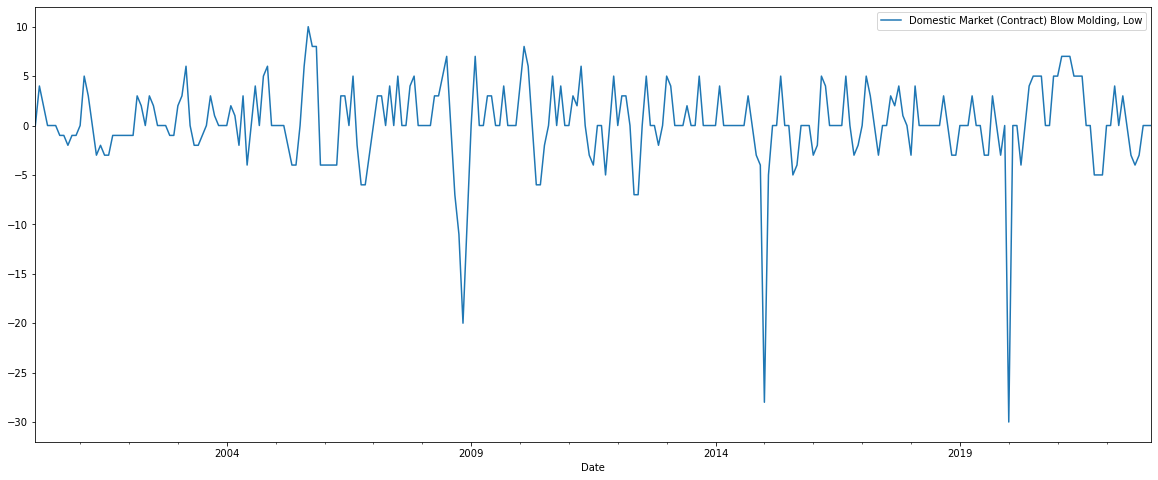

In [11]:
data_diff=new_data_resample.diff().dropna()

data_diff.plot(figsize=(20,8))

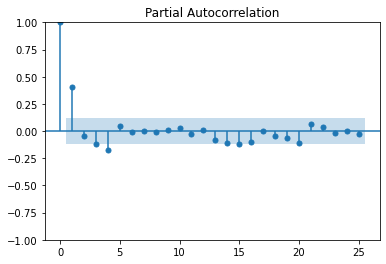

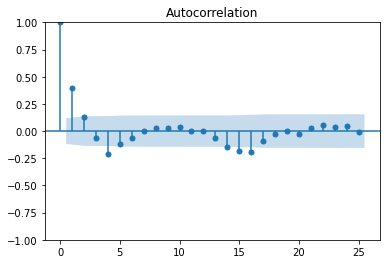

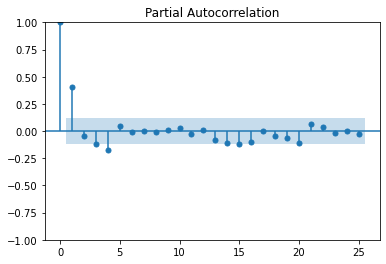

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_diff)
plot_pacf(data_diff)

splitting data into train and test

In [13]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data_diff, test_size=0.2, shuffle=False)
print(train_data)
print(test_data)

            Domestic Market (Contract) Blow Molding, Low
Date                                                    
2000-02-29                                           0.0
2000-03-31                                           4.0
2000-04-30                                           2.0
2000-05-31                                           0.0
2000-06-30                                           0.0
...                                                  ...
2018-01-31                                          -3.0
2018-02-28                                           4.0
2018-03-31                                           0.0
2018-04-30                                           0.0
2018-05-31                                           0.0

[220 rows x 1 columns]
            Domestic Market (Contract) Blow Molding, Low
Date                                                    
2018-06-30                                           0.0
2018-07-31                                           0.0
2018-08

# ARIMA MODEL

In [14]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [15]:
model = ARIMA(train_data,order=(6,1,1))
model_fit = model.fit()

arima_preds = model_fit.forecast(steps=len(test_data))
arima_preds

2018-06-30   -0.856352
2018-07-31    0.202720
2018-08-31    0.118301
2018-09-30    0.258206
2018-10-31    0.416162
2018-11-30    0.215839
2018-12-31    0.236494
2019-01-31    0.163092
2019-02-28    0.125961
2019-03-31    0.156544
2019-04-30    0.152737
2019-05-31    0.177344
2019-06-30    0.187667
2019-07-31    0.185824
2019-08-31    0.187116
2019-09-30    0.180443
2019-10-31    0.177334
2019-11-30    0.176188
2019-12-31    0.175502
2020-01-31    0.177003
2020-02-29    0.177901
2020-03-31    0.178588
2020-04-30    0.178929
2020-05-31    0.178680
2020-06-30    0.178452
2020-07-31    0.178195
2020-08-31    0.178050
2020-09-30    0.178060
2020-10-31    0.178104
2020-11-30    0.178182
2020-12-31    0.178235
2021-01-31    0.178250
2021-02-28    0.178247
2021-03-31    0.178228
2021-04-30    0.178211
2021-05-31    0.178201
2021-06-30    0.178199
2021-07-31    0.178203
2021-08-31    0.178207
2021-09-30    0.178211
2021-10-31    0.178213
2021-11-30    0.178212
2021-12-31    0.178211
2022-01-31 

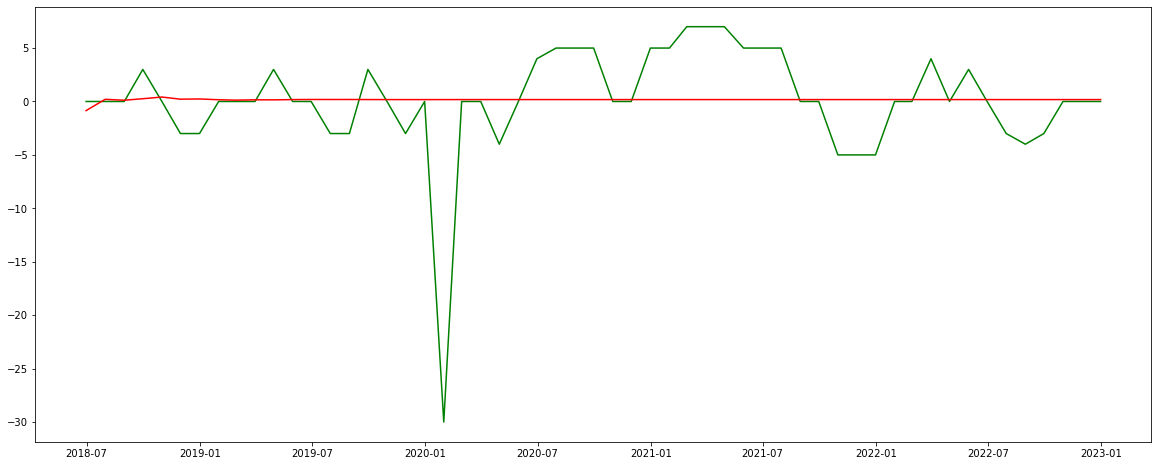

In [16]:
plt.figure(figsize=(20,8))
plt.plot(test_data,color='green')
plt.plot(arima_preds,color='red')
plt.show()

In [17]:
mse=mean_squared_error(test_data,arima_preds)
rmse=np.sqrt(mse)
mae=mean_absolute_error(test_data,arima_preds)
mape=mean_absolute_percentage_error(test_data,arima_preds)*100

print(f'MSE:{mse:.2f}')
print(f'RMSE:{rmse:.2f}')
print(f'MAE:{mae:.2f}')
print(f'MAPE:{mape:.2f}%')

MSE:27.01
RMSE:5.20
MAE:2.90
MAPE:43007908818026456.00%


# Lazyclassifier

In [18]:
from lazypredict.Supervised import LazyClassifier

X = data_diff.index.values
y= data_diff['Domestic Market (Contract) Blow Molding, Low']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:00<00:00, 676.79it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DummyClassifier,0.44,0.08,None,0.27,0.00


# LSTM MODEL

In [19]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [20]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(12,1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# train the LSTM model
model.fit(X_train, y_train, epochs=100, verbose=0)

# evaluate the LSTM model
y_pred = model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_pred)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported numpy type: NPY_DATETIME).